# Physics-Informed Neural Networks (PINNs) Tutorial
## 1️⃣ What are PINNs?
**Physics-Informed Neural Networks (PINNs)** are neural networks that incorporate the *laws of physics* (e.g., PDEs or ODEs) directly into their loss function.
Instead of learning only from data, they learn from both:
- **Data** (observations)
- **Physics** (governing equations like Navier–Stokes, Heat, or Wave equations)
PINNs can solve both forward and inverse problems efficiently.

## 2️⃣ Why PINNs are Unique
| Feature | Classical ML | PDE Solvers | PINNs |
|----------|---------------|-------------|--------|
| Uses physical laws | ❌ | ✅ | ✅ |
| Requires large labeled data | ✅ | ❌ | ❌ |
| Mesh/grid requirement | ❌ | ✅ | ❌ |
| Generalizable | ❌ | ❌ | ✅ |
**Uniqueness:** PINNs embed physics via the loss function, use autodiff for PDE residuals, and work for forward/inverse tasks.

## 3️⃣ Applications of PINNs
### 🔹 Forward Problems
- Solve known PDEs for unknown fields (e.g., heat conduction, fluid flow).
### 🔹 Inverse Problems
- Estimate unknown parameters or hidden fields.
Examples:
- **Ultrasound Imaging:** Recover tissue acoustic properties from wave data.
- **Geo-Imaging / Seismic Inversion:** Infer subsurface velocity/density.
- **Material Characterization:** Learn diffusivity, viscosity, or elasticity.
- **Parameter Discovery:** Identify unknown coefficients in PDEs.

## 4️⃣ Demo: Differentiation of sin(x) using PINNs

Epoch 0, Loss = 0.621692
Epoch 200, Loss = 0.000076
Epoch 400, Loss = 0.000021
Epoch 600, Loss = 0.000013
Epoch 800, Loss = 0.000010
Epoch 1000, Loss = 0.000011
Epoch 1200, Loss = 0.000005
Epoch 1400, Loss = 0.000007
Epoch 1600, Loss = 0.000003
Epoch 1800, Loss = 0.000429


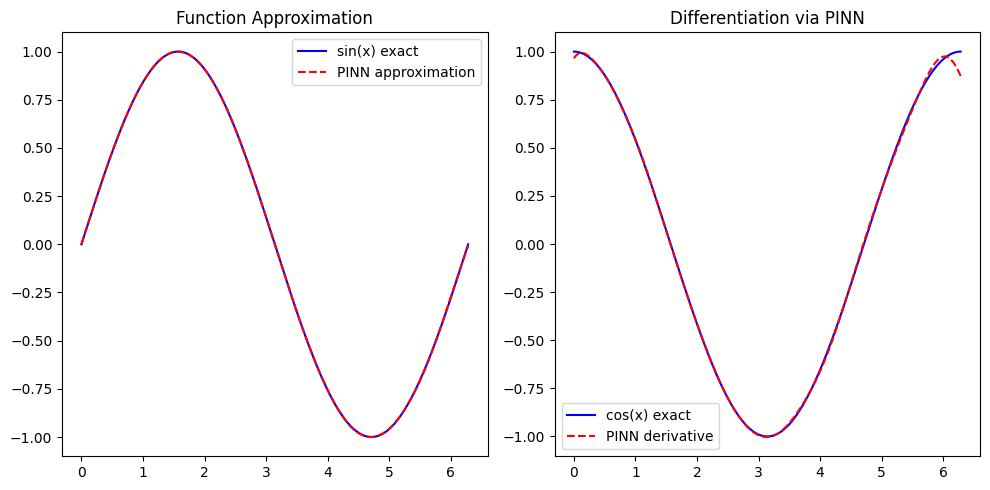

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(1, 40),
            nn.Tanh(),
            nn.Linear(40, 40),
            nn.Tanh(),
            nn.Linear(40, 1)
        )
    def forward(self, x):
        return self.hidden(x)

x_train = torch.linspace(0, 2*np.pi, 100).view(-1,1)
y_train = torch.sin(x_train)

model = PINN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

for epoch in range(2000):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 200 == 0:
        print(f'Epoch {epoch}, Loss = {loss.item():.6f}')

x_test = torch.linspace(0, 2*np.pi, 200).view(-1,1)
x_test.requires_grad = True
y_pred = model(x_test)
dy_dx = torch.autograd.grad(outputs=y_pred, inputs=x_test, grad_outputs=torch.ones_like(y_pred), create_graph=True)[0]
y_true = torch.sin(x_test)
dy_true = torch.cos(x_test)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x_test.detach().numpy(), y_true.detach().numpy(), 'b', label='sin(x) exact')
plt.plot(x_test.detach().numpy(), y_pred.detach().numpy(), 'r--', label='PINN approximation')
plt.legend(); plt.title('Function Approximation')

plt.subplot(1,2,2)
plt.plot(x_test.detach().numpy(), dy_true.detach().numpy(), 'b', label='cos(x) exact')
plt.plot(x_test.detach().numpy(), dy_dx.detach().numpy(), 'r--', label='PINN derivative')
plt.legend(); plt.title('Differentiation via PINN')
plt.tight_layout(); plt.show()

## 5️⃣ Summary
- PINNs merge neural networks and physics laws.
- They work for forward and inverse problems.
- Applications: ultrasound imaging, geo-imaging, material parameter estimation, etc.
- This example shows how autodiff enables differentiating functions (core of PINNs).